# Pregunta 1

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [5]:
%%file vertices2.csv
ID_Calle,ID_Interseccion,Costo
4827820,4827937,14
4827820,4828021,15
4827832,4827849,13
4827832,4827860,9
4827832,4827863,13
4827843,4827820,22
4827843,4827892,15
4827843,4827894,18
4827845,4827820,24
4827845,4827908,25
4827845,4827878,20
4827849,4827909,14
4827849,4827926,10
4827849,4827937,14
4827860,4827878,20
4827863,4827843,10
4827863,4827937,14
4827876,4827820,14
4827876,4827878,20
4827876,4827883,22
4827878,4827896,11
4827878,4827908,25
4827883,4827845,24
4827883,4827843,10
4827892,4827883,22
4827892,4827820,15
4827892,4827894,18
4827894,4827832,16
4827894,4827843,10
4827894,4827845,24
4827896,4827894,18
4827896,4828021,15
4827908,4827832,16
4827908,4827860,9
4827908,4828021,15
4827909,4827863,13
4827926,4827896,11
4827937,4827820,14
4827937,4827845,24
4828021,4827860,9
4828021,4827843,10
4828025,4828352,23
4828025,4827892,15
4828025,4827843,10
4828352,4827863,13
4828352,4827909,14

Overwriting vertices2.csv


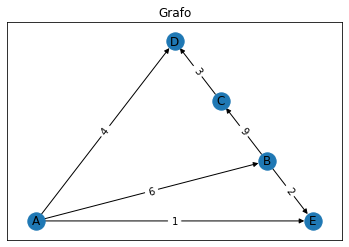

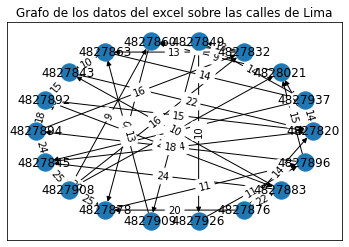

In [6]:
def agregar_arista(G,u,v,w=1,di=True):
    G.add_edge(u,v,weight=w)

    if not di:
        G.add_edge(v,u,weight=w)

#Prueba de grafo ponderado con datos de las calles
def leer_csv(F):
    #Lectura de datos para la impresión del grafo ponderado de las calles
    datos=pd.read_csv('vertices2.csv',header=0)
    idcalle=datos['ID_Calle']
    idorigeninterseccion=datos['ID_Interseccion']
    costo=datos['Costo']
    for i in range(0,40):
        agregar_arista(F, idcalle[i], idorigeninterseccion[i], costo[i])
        
if __name__=="__main__":    
    
    F = nx.DiGraph()
    leer_csv(F)
    G = nx.DiGraph()
    #Grafo ponderado
    agregar_arista(G,"A","B",6)
    agregar_arista(G,"A","D",4)
    agregar_arista(G,"A","E",1)
    agregar_arista(G,"B","C",9)
    agregar_arista(G,"B","E",2)
    agregar_arista(G,"C","D",3)
    
    pos=nx.layout.planar_layout(G)
    nx.draw_networkx(G, pos)
    labels=nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.title("Grafo")
    plt.show()
    
    pos=nx.layout.circular_layout(F,scale=10)
    nx.draw_networkx(F, pos)
    labels=nx.get_edge_attributes(F, 'weight')
    nx.draw_networkx_edge_labels(F,pos,edge_labels=labels)
    plt.title("Grafo de los datos del excel sobre las calles de Lima")
    plt.show()
    